# 필수과제

## 1. 로그스케일링
- 왜도 첨도를 비교시 한쪽으로 값이 치우진 경우에 사용한다.
- 로그스케일링에 대한 개념과 그에 대한 예시 코드, 주석 진행

* 로그 변환을 통해 왜도와 첨도를 가진 변수를 정규분포에 가깝게 만들어줌.
* Numpy를 이용해 원하는 컬럼에 log() 함수를 호출하는 것만으로 쉽게 가능.
- [1,10]의 범위를 [0,1]의 범위로, [10,100] 범위를 [1,2] 범위로 매핑함.
- 큰 수치를 같은 비율의 작은 수치로 변환해주는 것

In [2]:
#필요 모듈 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#데이터를 읽어온다.
df_train = pd.read_csv('./train.csv') #주택 가격 데이터
#데이터를 출력한다.
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# skewness 확인
df_train['LotArea'].skew()

12.207687851233496

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

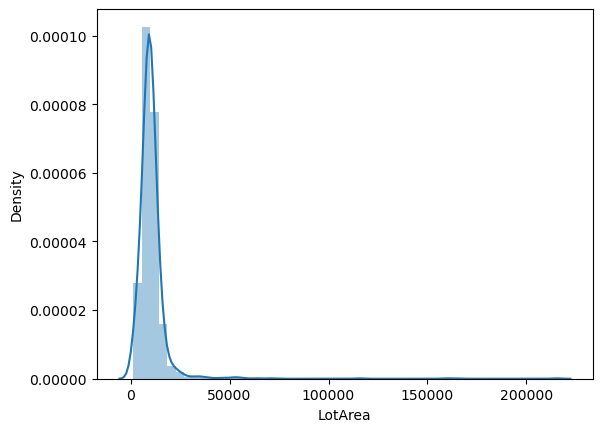

In [4]:
# KDE plot 확인
sns.distplot(df_train['LotArea'])

# -2 ~ +2는 치우침 없는 데이터
# -2 미만은 Negative Skew, +2 초과는 Positive Skew
# Positive Skewness는 오른쪽에 꼬리를 가진(왼쪽에 데이터가 많은)형태이고, 
# Negative Skewness는 왼쪽에 꼬리를 가진(오른쪽에 데이터가 많은) 형태

In [6]:
# 최솟값 확인
df_train['LotArea'].describe()

#최솟값이 0보다 작다면 최솟값+1을 모든 값에 더해주는 것이 보편적.

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [9]:
# 로그 변환
df_log = np.log(df_train['LotArea'])
df_log

0       9.041922
1       9.169518
2       9.328123
3       9.164296
4       9.565214
          ...   
1455    8.976768
1456    9.486076
1457    9.109636
1458    9.181632
1459    9.204020
Name: LotArea, Length: 1460, dtype: float64

In [10]:
# skewness 확인
print(df_log.skew())

# 0에 가까운 왜도가 나온다!

-0.1379938086958118


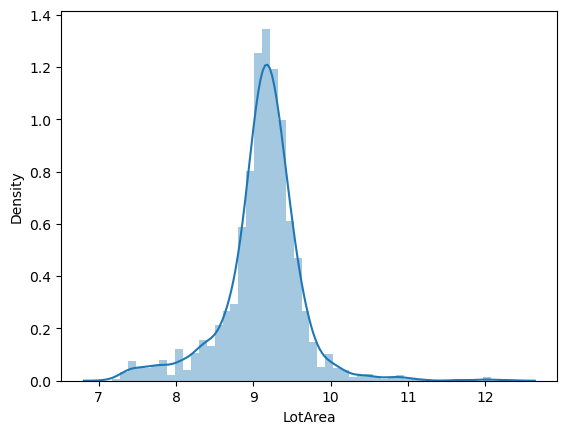

In [11]:
# KDE plot 출력
sns.distplot(df_log);

## 2. 데이터 전처리
- 머신에 바로 학습할 수 있도록 데이터 전처리 형태로 만들어서 CSV 파일 생성

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_call = pd.read_csv('call_data.csv')
df_call

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [14]:
df_call.info() #결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

plt.rc('font', family='Malgun Gothic')v #한글 깨짐 해결

<AxesSubplot:>

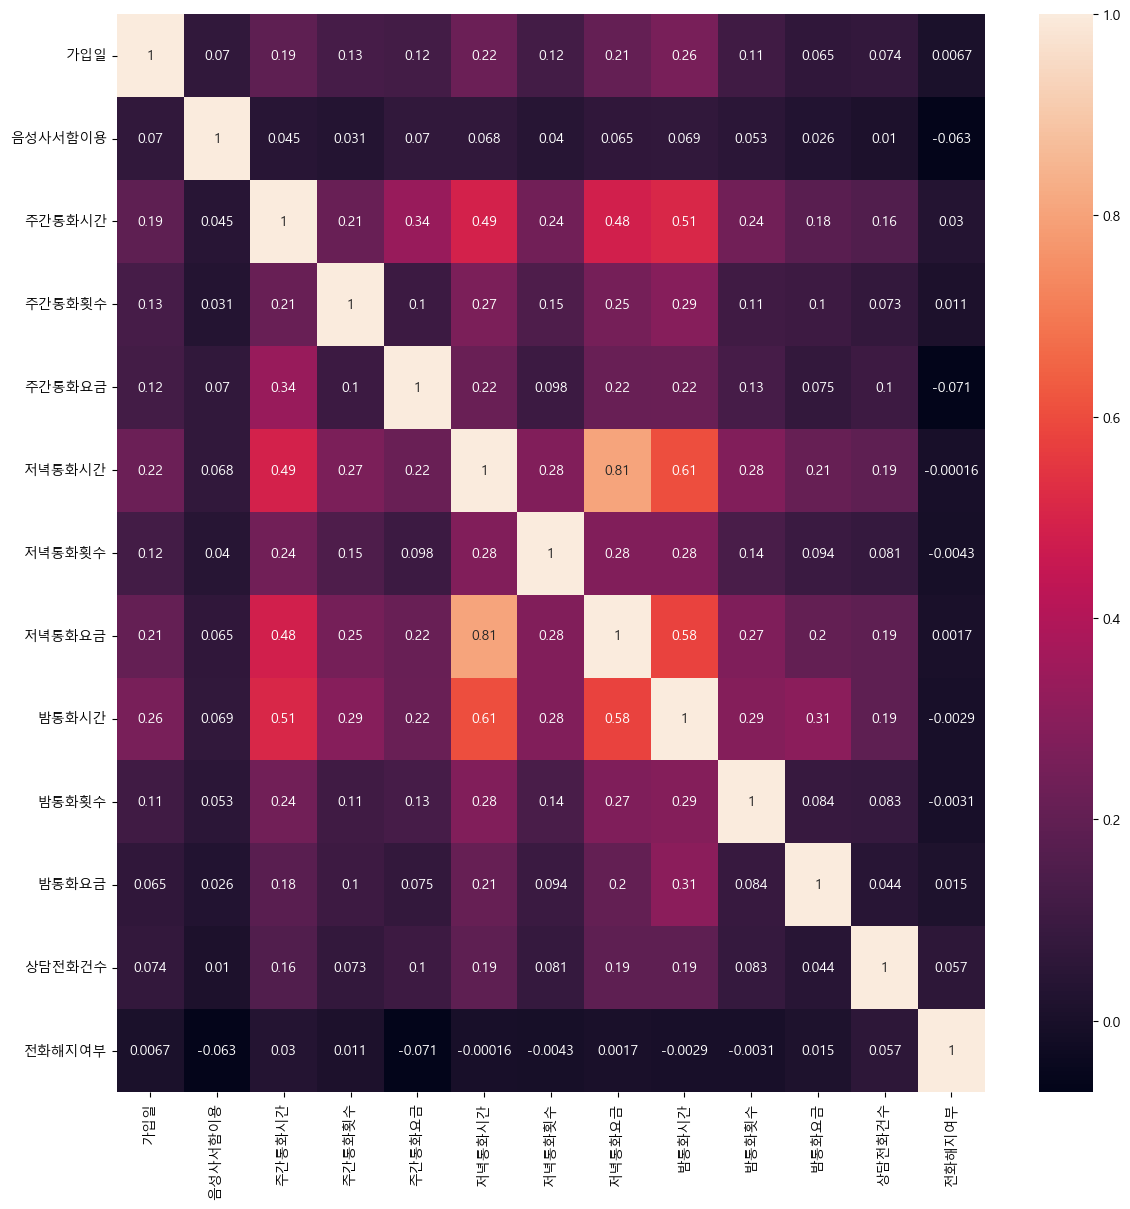

In [19]:
# seaborn의 heatmap함수를 통해 불러온 데이터프레임의 상관계수들 시각화 
# 데이터프레임 corr() 메서드
plt.figure(figsize=(14, 14))
sns.heatmap(data=df_call.corr(), annot=True)

- 저녁통화요금과 저녁통화시간, 밤통화시간과 저녁통화시간의 상관관계가 높음을 알 수 있다(하지만 당연히 생각할 수 있는 사실들)
- 저녁통화시간과 주간통화시간, 저녁통화요금과 주간통화시간, 밤통화시간과 주간통화시간, 저녁통화시간과 밤통화시간의 상관관계가 있음을 알 수 있다. 
- 가입일, 음성사서함이용, 상담전화건수, 전화해지여부는 눈에 띄는 상관관계가 없음을 알 수 있다.

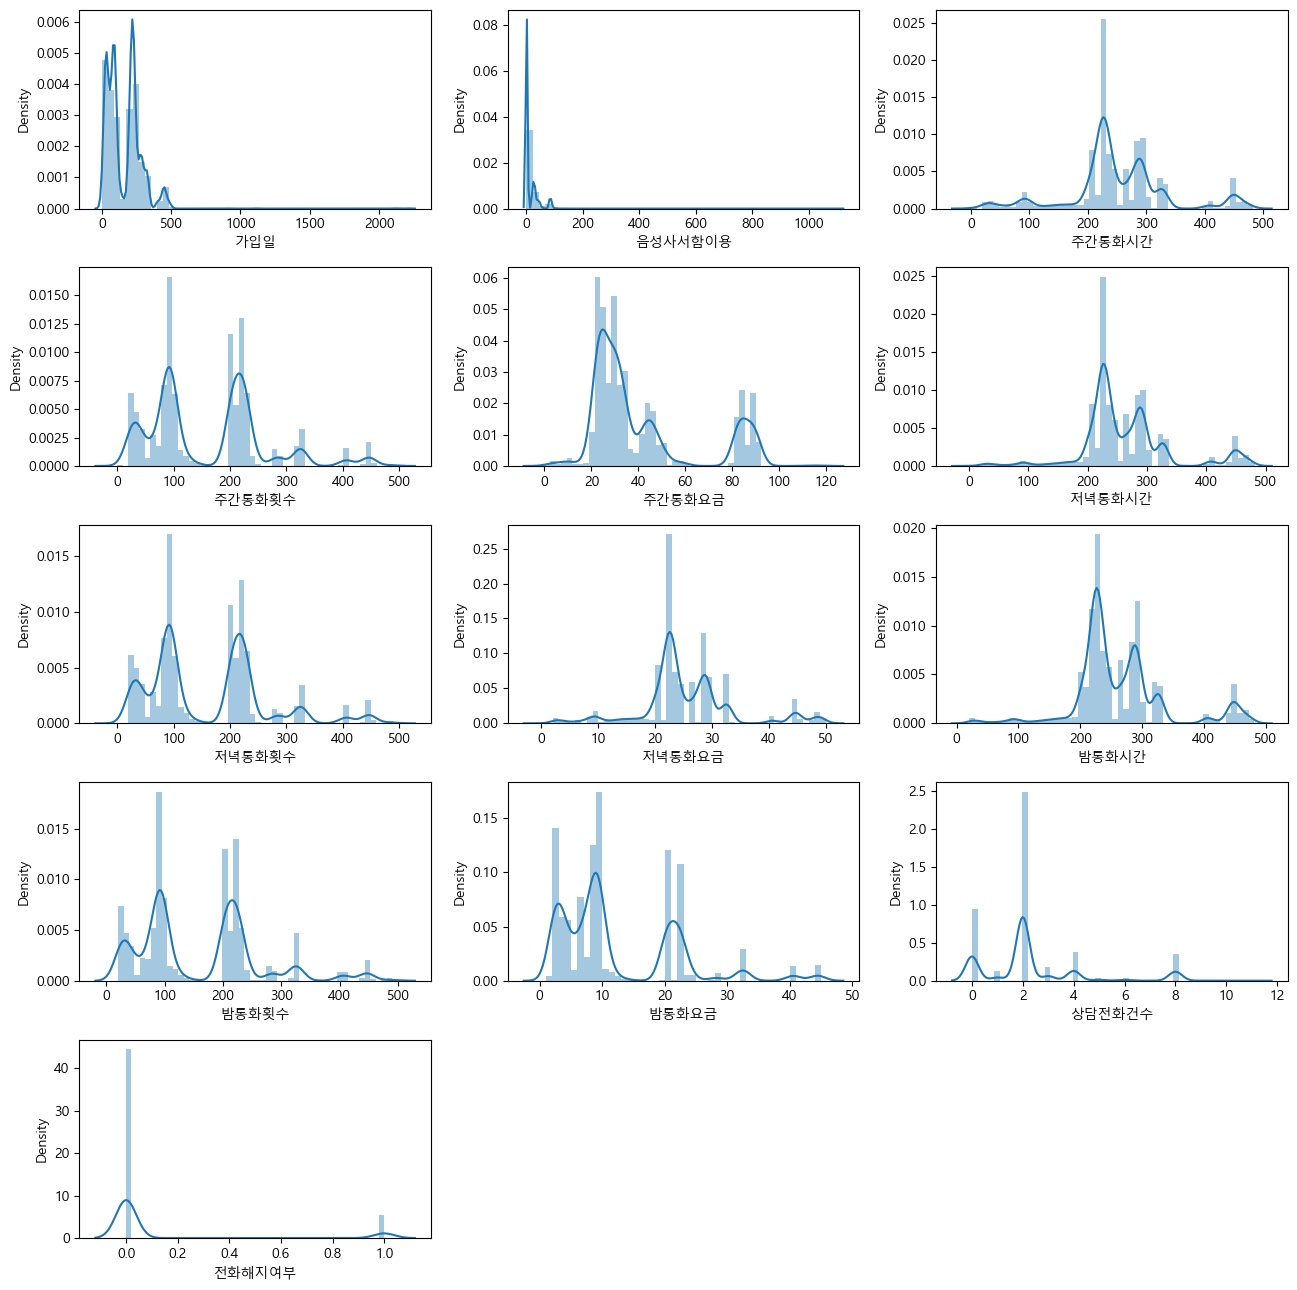

In [24]:
#df_call = df_call.drop(['ID'], axis=1) #문자열인 ID열 제거

# 각 칼럼별 분포 확인
plt.figure(figsize=(13, 13))

for i in range(13):
    plt.subplot(5, 3, i+1)
    sns.distplot(df_call.iloc[:, i])
plt.tight_layout()
plt.show()

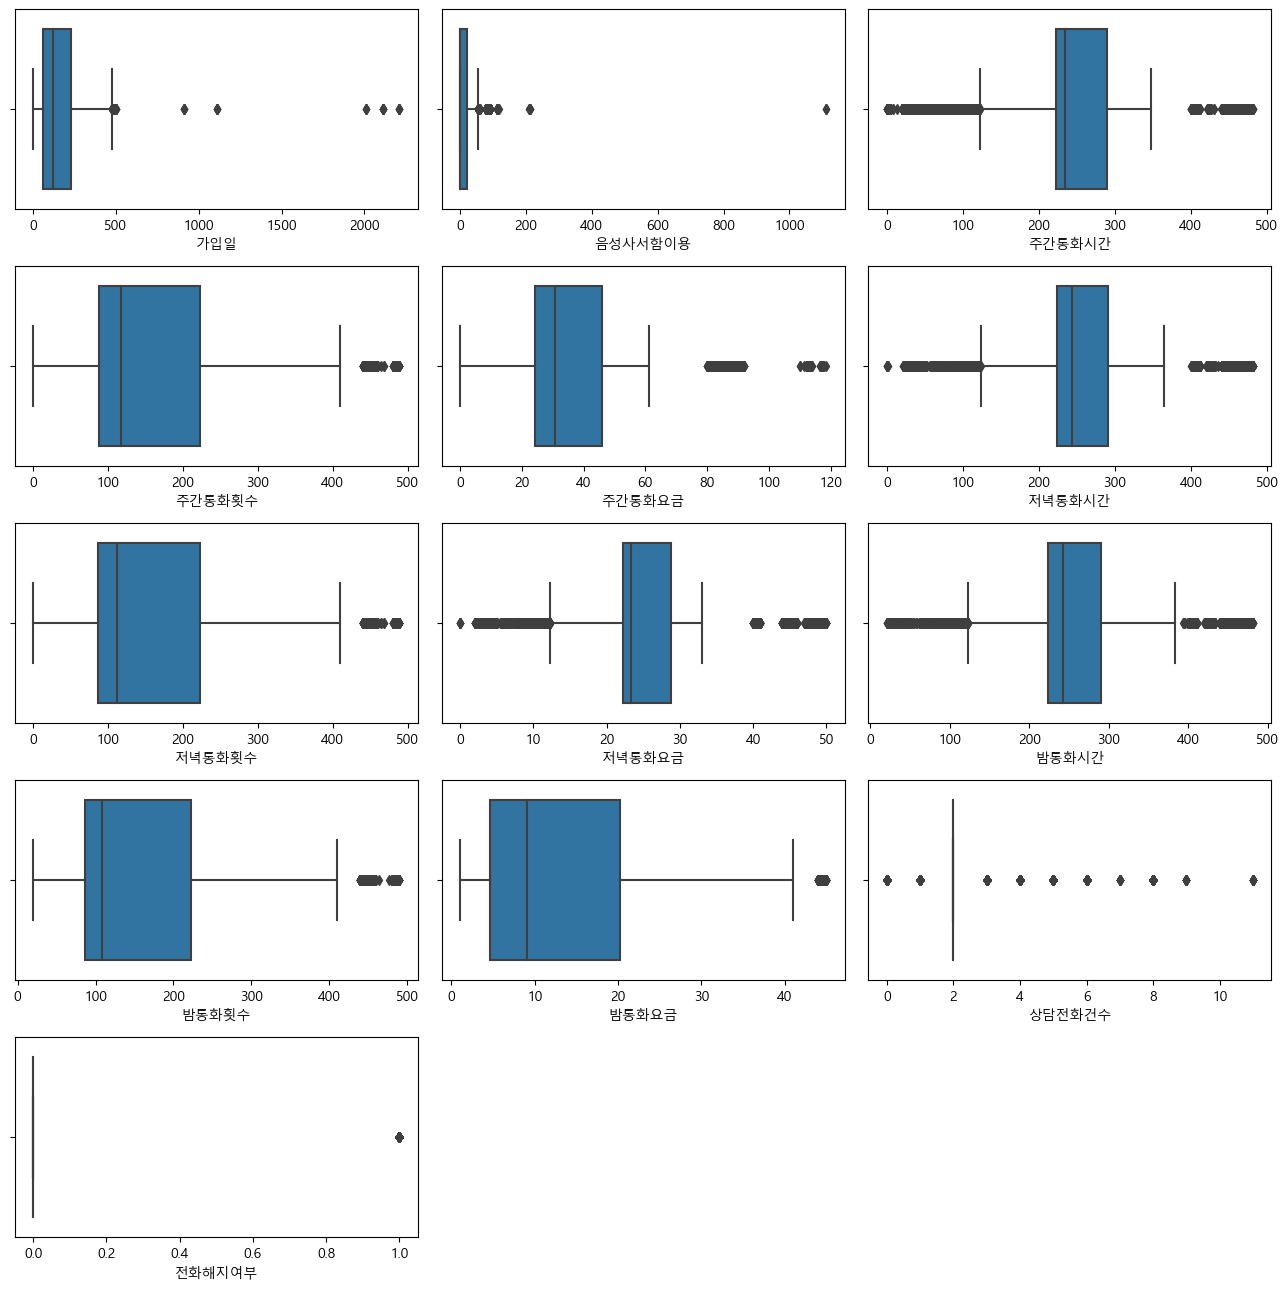

In [31]:
# 각 칼럼별 분포 확인 
#이상치 관측 위해서 시도
plt.figure(figsize=(13, 13))

for i in range(13):
    plt.subplot(5, 3, i+1)
    sns.boxplot(df_call.iloc[:, i])
plt.tight_layout()
plt.show()

In [25]:
df_call

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [27]:
df_call.columns

Index(['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간', '저녁통화횟수',
       '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', '전화해지여부'],
      dtype='object')

In [3]:
x_df = df_call[['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간', '저녁통화횟수',
       '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수']]
x_df

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2
1,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2
2,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0
3,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0
4,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8
...,...,...,...,...,...,...,...,...,...,...,...,...
30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2
30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2
30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2
30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2


In [4]:
y_df = df_call[['전화해지여부']]
y_df

,전화해지여부
0,0
1,0
2,0
3,0
4,0
...,...
30195,0
30196,0
30197,0
30198,1


### Scaler
- 각 칼럼별 분포를 확인했을 때, 각 분포들이 정규분포이지 않은 것을 확인하여
- `StandardScaler` 보다 `RobustScaler`를 사용하는 것이 옳다고 결정.
- `MinMaxScaler`는 이상치에 영향을 많이 받을 것 같아 제외.

In [5]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler() #객체 생성
robust_scaler.fit(x_df) #데이터의 모수 분포 저장
call_scaled = robust_scaler.transform(x_df) #데이터 스케일링

call_df_scaled = pd.DataFrame(data=call_scaled, columns=x_df.columns)
print('feature들의 최솟값')
print(call_df_scaled.min())
print('\nfeature들의 최댓값')
print(call_df_scaled.max())
print('\nfeature들의 평균값')
print(call_df_scaled.mean())
print('\nfeature들의 중앙값')
print(call_df_scaled.median())

feature들의 최솟값
가입일       -0.709091
음성사서함이용   -0.045455
주간통화시간    -3.502994
주간통화횟수    -0.870370
주간통화요금    -1.432558
저녁통화시간    -3.647147
저녁통화횟수    -0.823529
저녁통화요금    -3.533333
밤통화시간     -3.323353
밤통화횟수     -0.651852
밤통화요금     -0.515715
상담전화건수    -2.000000
dtype: float64

feature들의 최댓값
가입일        12.690909
음성사서함이용    50.500000
주간통화시간      3.711078
주간통화횟수      2.751852
주간통화요금      4.083721
저녁통화시간      3.582583
저녁통화횟수      2.772059
저녁통화요금      4.039394
밤통화시간       3.577844
밤통화횟수       2.829630
밤통화요금       2.302758
상담전화건수      9.000000
dtype: float64

feature들의 평균값
가입일        0.252925
음성사서함이용    0.501719
주간통화시간     0.247956
주간통화횟수     0.308709
주간통화요금     0.478672
저녁통화시간     0.304012
저녁통화횟수     0.341725
저녁통화요금     0.314282
밤통화시간      0.308956
밤통화횟수      0.363314
밤통화요금      0.192088
상담전화건수     0.288079
dtype: float64

feature들의 중앙값
가입일        0.0
음성사서함이용    0.0
주간통화시간     0.0
주간통화횟수     0.0
주간통화요금     0.0
저녁통화시간     0.0
저녁통화횟수     0.0
저녁통화요금     0.0
밤통화시간      0.0
밤통화횟수      0.0
밤통화요금      0.0

In [6]:
call_df_scaled

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,1.278788,-0.045455,-2.017964,-0.181481,-0.162791,0.387387,-0.323529,0.848485,0.300898,1.629630,1.527261,0.0
1,-0.703030,3.590909,1.345808,1.522222,2.460465,0.396396,1.573529,1.328788,1.197605,0.748148,1.490699,0.0
2,-0.151515,1.227273,0.724551,1.522222,0.158140,-0.540541,1.544118,1.439394,0.568862,1.629630,-0.051315,-2.0
3,0.636364,0.000000,-0.188623,0.781481,-0.265116,-0.150150,-0.375000,0.087879,-0.583832,0.933333,0.017960,-2.0
4,0.630303,-0.045455,-2.061377,0.774074,-0.097674,-0.286787,-0.316176,0.721212,0.303892,0.851852,-0.402822,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30195,0.878788,3.590909,0.832335,0.618519,-0.418605,0.563063,1.551471,0.993939,-0.520958,-0.311111,0.012829,0.0
30196,1.000000,3.636364,-0.348802,1.203704,2.776744,0.617117,0.661765,1.436364,0.673653,0.703704,-0.179602,0.0
30197,-0.569697,-0.045455,-0.173653,-0.625926,-0.404651,-0.136637,-0.588235,-0.166667,0.760479,-0.096296,-0.311738,0.0
30198,-0.333333,0.000000,0.425150,0.625926,-0.055814,0.564565,1.250000,0.842424,0.570359,0.733333,0.756895,0.0


모든 데이터들이 숫자형.

위의 그래프들을 통해 이상치들이 몇 있는 것을 확인했지만, 제거하는 것보다 포함시키는 것이 더 낫다고 생각하여 이상치를 따로 제거해주지 않았다.

추가로 전처리 할 요소들을 찾지 못하겠어서 여기까지 진행하였다.

상관계수가 높은 변수들 중 몇 컬럼을 제거해볼까 생각했지만, 너무나 높은 것이 아니라서 그냥 두는 것이 나을 것 같았다.

In [7]:
call_df_scaled.to_csv('call_data_scaled.csv')